In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("emails.csv")

In [3]:
data.sample()

,text,spam
2895,Subject: re : marketpoint gas model john : t...,0


In [4]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [5]:
data.duplicated().sum()

33

In [6]:
data=data.drop_duplicates(keep='first')

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(5695, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [10]:
data1=data.rename(columns={'spam':'target'})

In [11]:
data1

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [12]:
data1['target'].value_counts()

0    4327
1    1368
Name: target, dtype: int64

In [13]:
import matplotlib.pyplot as plt

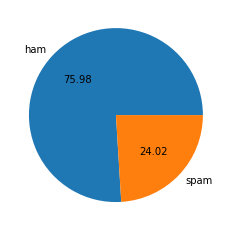

In [14]:
plt.pie(data1['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data1['num of character']=data1['text'].apply(len)

In [18]:
data1

,text,target,num of character
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
5723,Subject: re : research and development charges...,0,1189
5724,"Subject: re : receipts from visit jim , than...",0,1167
5725,Subject: re : enron case study update wow ! a...,0,2131
5726,"Subject: re : interest david , please , call...",0,1060


In [19]:
data1['num_words']=data1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
data1

,text,target,num of character,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53
...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298
5724,"Subject: re : receipts from visit jim , than...",0,1167,245
5725,Subject: re : enron case study update wow ! a...,0,2131,516
5726,"Subject: re : interest david , please , call...",0,1060,277


In [21]:
data1['num of sentence']=data1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
data1

,text,target,num of character,num_words,num of sentence
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30
5726,"Subject: re : interest david , please , call...",0,1060,277,6


In [23]:
data1[['num of character','num_words','num of sentence']].describe()

,num of character,num_words,num of sentence
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [24]:
data1[data1['target'] == 1][['num of character','num_words','num of sentence']].describe()

#spam data 

,num of character,num_words,num of sentence
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


# ham data size

In [25]:
data1[data1['target']==0][['num of character','num_words','num of sentence']].describe()

,num of character,num_words,num of sentence
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [26]:
# plt.figure(figsize=(12,6))
# sns.histplot(df[df['target'] == 0]['num_characters'])
# sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num of character', ylabel='Count'>

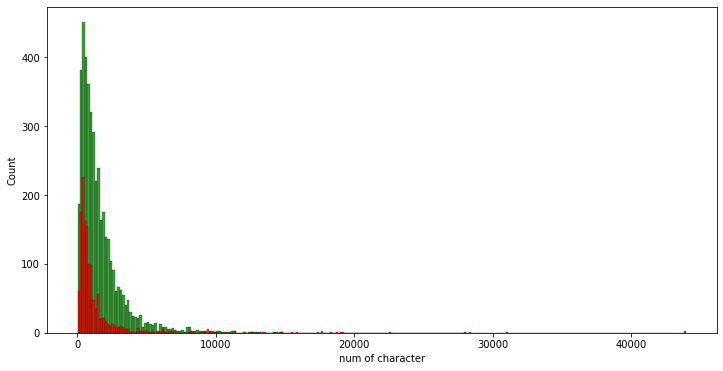

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data1[data1['target']==0]['num of character'],color='green')#ham data
sns.histplot(data1[data1['target']==1]['num of character'],color='red')#spam data

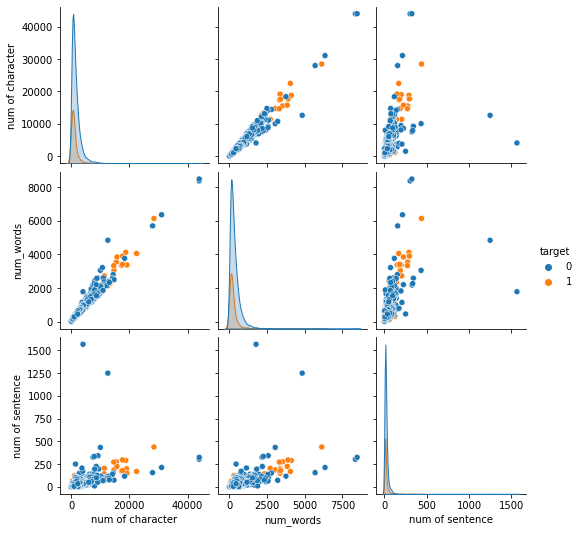

In [29]:
sns.pairplot(data1,hue='target')

<AxesSubplot:>

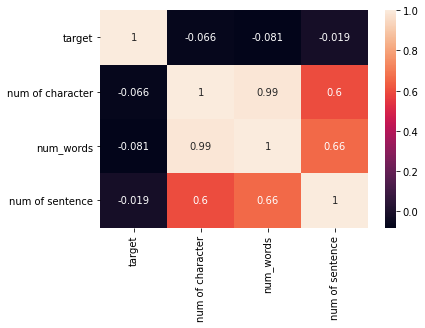

In [30]:
sns.heatmap(data1.corr(),annot=True)

# Data Preprocessing

    Lower case
    Tokenization
    Removing special characters
    Removing stop words and punctuation
    Stemming


In [31]:
import string




def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
        
    
    
    
    
    
    
    
    

 

    
    



In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [34]:
# df['transformed_text'] = df['text'].apply(transform_text)

In [35]:
data1.head()

,text,target,num of character,num_words,num of sentence
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [36]:
transform_text("Hi @ im hira ashrafi 123 eating at home")

'hi im hira ashrafi 123 eat home'

In [37]:
transform_text("hello i am hira ashrafi Eating at home After Eating now Sleeping @123")

'hello hira ashrafi eat home eat sleep 123'

In [38]:
data1['transform_text']=data1['text'].apply(transform_text)

,text,target,num of character,num_words,num of sentence,transform_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,subject research develop charg gpg forward shi...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,subject receipt visit jim thank invit visit ls...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,subject enron case studi updat wow day super t...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,subject interest david pleas call shirley cren...


In [49]:
!pip install wordcloud



ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud


In [ ]:
# plt.figure(figsize=(15,6))
# plt.imshow(spam_wc)

In [50]:
# ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [51]:
data1

,text,target,num of character,num_words,num of sentence,transform_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,subject research develop charg gpg forward shi...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,subject receipt visit jim thank invit visit ls...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,subject enron case studi updat wow day super t...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,subject interest david pleas call shirley cren...


In [57]:
spam_corpus=[]
for msg in data1[data1['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
spam_corpus

['subject',
 'natur',
 'irresist',
 'corpor',
 'ident',
 'lt',
 'realli',
 'hard',
 'recollect',
 'compani',
 'market',
 'full',
 'suqgest',
 'inform',
 'isoverwhelminq',
 'good',
 'catchi',
 'logo',
 'stylish',
 'statloneri',
 'outstand',
 'websit',
 'make',
 'task',
 'much',
 'easier',
 'promis',
 'havinq',
 'order',
 'iogo',
 'compani',
 'automaticaili',
 'becom',
 'world',
 'ieader',
 'isguit',
 'ciear',
 'without',
 'good',
 'product',
 'effect',
 'busi',
 'organ',
 'practic',
 'aim',
 'hotat',
 'nowaday',
 'market',
 'promis',
 'market',
 'effort',
 'becom',
 'much',
 'effect',
 'list',
 'clear',
 'benefit',
 'creativ',
 'hand',
 'made',
 'origin',
 'logo',
 'special',
 'done',
 'reflect',
 'distinct',
 'compani',
 'imag',
 'conveni',
 'logo',
 'stationeri',
 'provid',
 'format',
 'easi',
 'use',
 'content',
 'manag',
 'system',
 'letsyou',
 'chang',
 'websit',
 'content',
 'even',
 'structur',
 'prompt',
 'see',
 'logo',
 'draft',
 'within',
 'three',
 'busi',
 'day',
 'afford',

In [59]:
from collections import Counter

In [62]:
#spam msg

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


c:\users\hira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


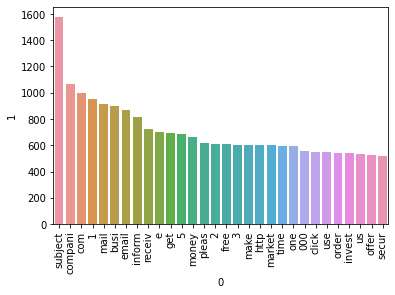

In [63]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
#ham msg

ham_corpus=[]

for msg in data1[data1['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [66]:
ham_corpus

['subject',
 'hello',
 'guy',
 'bug',
 'complet',
 'questionnair',
 'one',
 'page',
 'bio',
 'statement',
 'thought',
 'busi',
 'edu',
 'new',
 'economi',
 'record',
 'incorrect',
 'pleas',
 'ship',
 'respons',
 'want',
 'put',
 'everyth',
 'togeth',
 'next',
 'week',
 'ship',
 'back',
 'everyon',
 'questionnair',
 'attach',
 'well',
 'copi',
 'bio',
 'page',
 'michael',
 'froehl',
 'two',
 'somewhat',
 'differ',
 'approach',
 'idea',
 'latter',
 'introduc',
 'panelist',
 'give',
 'background',
 'approach',
 'issu',
 'discuss',
 'also',
 'provid',
 'copi',
 'attende',
 'use',
 'materi',
 'person',
 'introduct',
 'open',
 'panel',
 'discuss',
 'thank',
 'look',
 'forward',
 'see',
 'two',
 'week',
 'john',
 'waco',
 'background',
 'mf',
 'doc',
 'jmartinbiosketch',
 'doc',
 'questionnair',
 'doc',
 'john',
 'martin',
 'carr',
 'p',
 'collin',
 'chair',
 'financ',
 'financ',
 'depart',
 'baylor',
 'univers',
 'po',
 'box',
 '98004',
 'waco',
 'tx',
 '76798',
 '254',
 '710',
 '4473',
 'of

In [70]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,enron,13335
1,ect,11410
2,subject,8565
3,vinc,8468
4,hou,5567
5,2000,4932
6,kaminski,4754
7,pleas,4440
8,com,4397
9,would,4124


c:\users\hira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


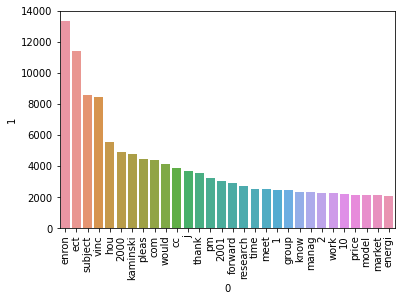

In [71]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# model building 4

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [74]:
# X = tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
tfidf=TfidfVectorizer()

In [76]:
X=tfidf.fit_transform(data1['transform_text']).toarray()

In [77]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12185147, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
y=data1['target'].values

In [79]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07352198, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [83]:
X_train.shape

(4556, 29220)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [85]:
gnb=GaussianNB()
mnb=MultinomialNB()
Bnb=BernoulliNB()

In [86]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score

In [87]:
gnb.fit(X_train,y_train)

GaussianNB()

In [88]:
gnb_pred=gnb.predict(X_test)

In [89]:
print("accuracy score :",accuracy_score(y_test,gnb_pred))

accuracy score : 0.9490781387181738


In [90]:
print("confusion metrics :",confusion_matrix(y_test,gnb_pred))

confusion metrics : [[836  13]
 [ 45 245]]


In [91]:
print("precision score :",precision_score(y_test,gnb_pred))

precision score : 0.9496124031007752
